In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
import numpy as np
import os
import time

In [2]:
# Constants
RANDOM_STATE = 42
data_file_name = 'spambase.data'
data_path = f'../data/spam/{data_file_name}'

In [3]:
# Load Data
spam_data = pd.read_csv(data_path, header=None)
spam_data

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [4]:
data = spam_data.drop(57, axis=1)
labels = spam_data[57]
print(data.shape)
print(labels.shape)

(4601, 57)
(4601,)


In [5]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

In [6]:
# Prepare clasifiers to compare with different values of M (max_features):
m_values = np.arange(1, len(train_data.columns))

clfs = []

for m in m_values:
    random_forest = (m, RandomForestClassifier(max_features=m, n_estimators=200, criterion="gini", oob_score=True, 
                                                random_state=RANDOM_STATE, warm_start=True))
    clfs.append(random_forest)

## Calculate errors

In [7]:
def get_oob_error(trained_clf):
    return 1 - trained_clf.oob_score_

In [8]:
def calculate_test_error(clf, test_data_, test_labels_):
    pred_labels = clf.predict(test_data_)
    accuracy = metrics.accuracy_score(test_labels_, pred_labels)
    return 1 - accuracy

In [9]:
results={}
for m, clf in clfs:
    # Train and measure train time.
    start = time.time()
    clf.fit(train_data, train_labels)
    end = time.time()
    train_time = end - start
    
    oob_100_error = get_oob_error(clf)
    test_error = calculate_test_error(clf, test_data, test_labels)
    
    print(f'M Value: {m}')
    print(f'Execution Time: {train_time}')
    print(f'OOB Error: {oob_100_error}')
    print(f'Test Error: {test_error}')
    print()
    
    results[m] = [train_time, oob_100_error, test_error]

M Value: 1
Execution Time: 0.6039998531341553
OOB Error: 0.04646739130434785
Test Error: 0.05428881650380024

M Value: 2
Execution Time: 0.7150158882141113
OOB Error: 0.0451086956521739
Test Error: 0.0456026058631922

M Value: 3
Execution Time: 1.0078120231628418
OOB Error: 0.0442934782608696
Test Error: 0.05103148751357223

M Value: 4
Execution Time: 0.7865710258483887
OOB Error: 0.04809782608695656
Test Error: 0.05428881650380024

M Value: 5
Execution Time: 0.8462660312652588
OOB Error: 0.04809782608695656
Test Error: 0.04885993485342022

M Value: 6
Execution Time: 0.9112429618835449
OOB Error: 0.048913043478260865
Test Error: 0.053203040173724236

M Value: 7
Execution Time: 1.0373990535736084
OOB Error: 0.046739130434782616
Test Error: 0.055374592833876246

M Value: 8
Execution Time: 1.072206974029541
OOB Error: 0.047010869565217384
Test Error: 0.05103148751357223

M Value: 9
Execution Time: 1.1984202861785889
OOB Error: 0.04836956521739133
Test Error: 0.053203040173724236

M Value:

## Plot Results

In [66]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

In [32]:
m_values=[]
oob_errors=[]
test_errors=[]
exec_times=[]

for m in results.keys():
    error_list = results[m]
    
    m_values.append(m)
    exec_times.append(error_list[0])
    oob_errors.append(error_list[1])
    test_errors.append(error_list[2])

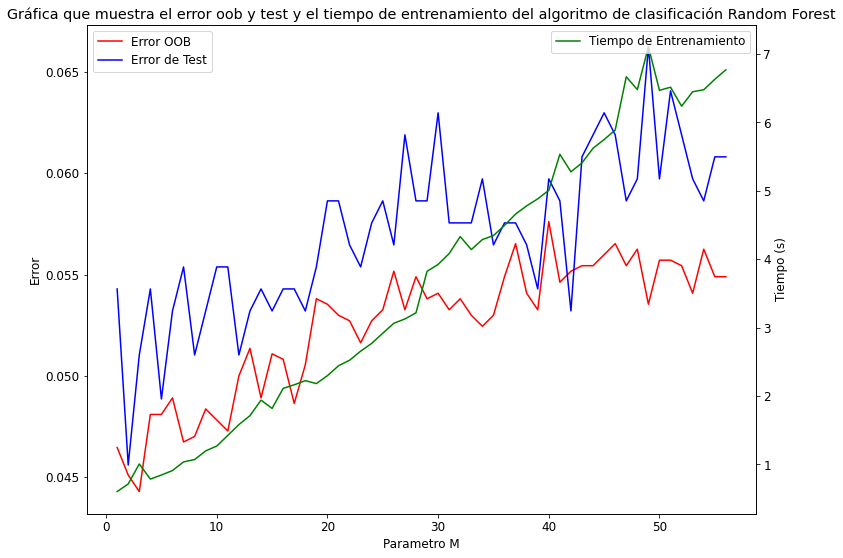

In [86]:
def plot_graph(m_value, oob_err, test_err, exec_time):
    
    fig, ax1 = plt.subplots(figsize=(12, 9))


    ax2 = ax1.twinx()
    ax1.plot(m_value, oob_err, 'r-', label='Error OOB')
    ax1.plot(m_value, test_err, 'b-', label='Error de Test')
    ax2.plot(m_value, exec_time, 'g-', label='Tiempo de Entrenamiento')


    
    ax1.set_xlabel("Parametro M")
    ax1.set_ylabel("Error")
    ax2.set_ylabel("Tiempo (s)")

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.title("Gráfica que muestra el error oob y test y el tiempo de entrenamiento del algoritmo de clasificación Random Forest")
    
    plt.savefig("exports/oob_error_comp.png", transparent=False)
    plt.show()
    
plot_graph(m_values, oob_errors, test_errors, exec_times)

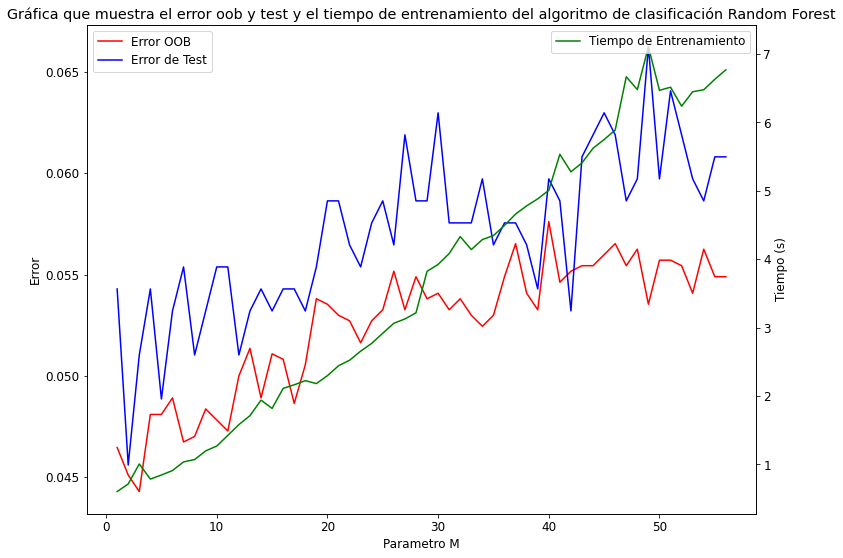